In [2]:
import scipy.stats as ss
import pylab as plt
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.plots import plot_marginals

%matplotlib notebook

## Example of n coin flips

In [5]:
# create beta prior and likelihood and posterior
N = 100
prior = ss.beta(2,2) # assume a fair coin
likelihood = lambda p: ss.binom(N, p)
posterior = lambda x: ss.beta(a + x, b + N - x)

# create simulator
def simulator(p, size=1):
    global N
    return ss.binom(N, p).rvs(size)

<IPython.core.display.Javascript object>


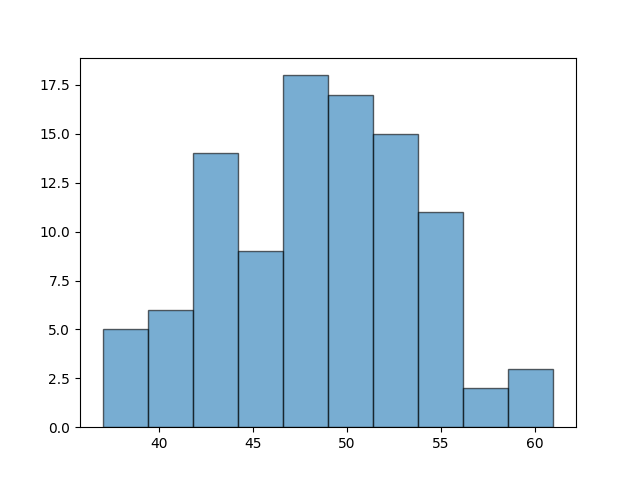

In [6]:
# what does the simulator produce?
plt.figure()
plt.hist(simulator(0.5, N), alpha=0.6, edgecolor="k")
plt.show()

# observation
X = simulator(0.2)

# true posterior: beta(a + sum x, b + sum N - sum x)
a, b = 3,3

<IPython.core.display.Javascript object>


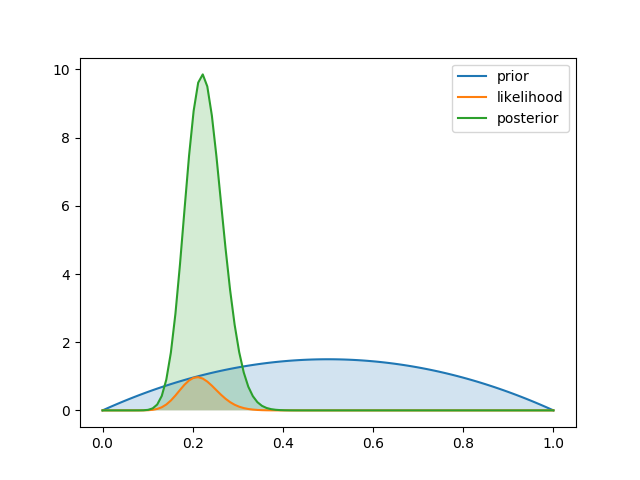

In [8]:
# what does the prior, likelihood and posterior look like?
plt.figure()
x = np.linspace(0,1, 100)

y = prior.pdf(x)
plt.plot(x,y, label="prior"); plt.fill_between(x, y1=0, y2=y, alpha=0.2)

scale = 10
y = scale * likelihood(x).pmf(X)
plt.plot(x,y, label="likelihood"); plt.fill_between(x, y1=0, y2=y, alpha=0.2)

y = posterior(X).pdf(x)
plt.plot(x,y, label="posterior"); plt.fill_between(x, y1=0, y2=y, alpha=0.2)

plt.legend()
plt.show()

## Use our ABC package

In [11]:
# now ABC
# create priorww
prior = pyabc.Prior("beta", 2, 2, name="p")

# sample and pdf of prior class
...

Rejection sampler started with threshold: 0 and number of samples: 1000
Samples:   1000 - Threshold: 0.0000 - Iterations:     103000 - Acceptance rate: 0.009709 - Time:    57.93 s


In [ ]:
# create sampler
rej = pyabc.RejectionSampler(priors=prior, simulator=simulator, summaries=lambda x: x, observation=X)

# sample
rej.sample(nr_samples=1000, threshold=0)

In [17]:
rej.Thetas

1

<IPython.core.display.Javascript object>


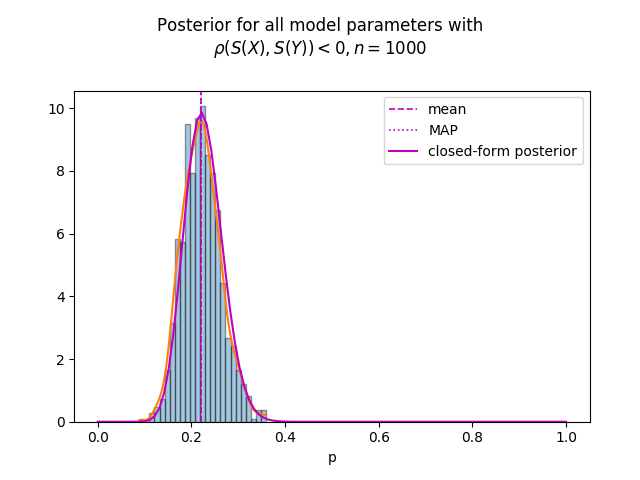

<IPython.core.display.Javascript object>


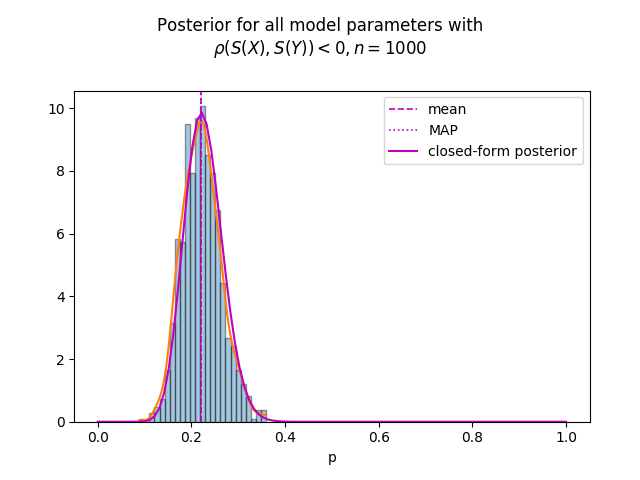

In [18]:
# plot marginals and posterior
plot_marginals(rej)

In [19]:
# and add posterior
x = np.linspace(0,1, 100)
y = posterior(X).pdf(x)
plt.plot(x,y, "-m", label='closed-form posterior')
plt.legend()